Author: Dan Shea  
Date: 2019.08.21  
#### Founder total SNP data sets count and frequency analyses.
Generate plots for total SNP data sets. One plot per founder (20 in total).

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
from statsmodels.stats import multitest
import os
import os.path
from collections import OrderedDict
from matplotlib import pyplot as plt
%matplotlib notebook

In [19]:
# Chromosome color scheme defined by UCSC genome browser
#UCSC_colors = {'chr01': 'darkgoldenrod',
#               'chr02': 'olive',
#               'chr03': 'darkkhaki',
#               'chr04': 'firebrick',
#               'chr05': 'orangered',
#               'chr06': 'mediumvioletred',
#               'chr07': 'pink',
#               'chr08': 'orange',
#               'chr09': 'gold',
#               'chr10': 'greenyellow',
#               'chr11': 'yellowgreen',
#               'chr12': 'green',}
UCSC_colors = {'chr01': (86/255, 180/255, 233/255),
               'chr02': (0/255, 158/255, 115/255),
               'chr03': (86/255, 180/255, 233/255),
               'chr04': (0/255, 158/255, 115/255),
               'chr05': (86/255, 180/255, 233/255),
               'chr06': (0/255, 158/255, 115/255),
               'chr07': (86/255, 180/255, 233/255),
               'chr08': (0/255, 158/255, 115/255),
               'chr09': (86/255, 180/255, 233/255),
               'chr10': (0/255, 158/255, 115/255),
               'chr11': (86/255, 180/255, 233/255),
               'chr12': (0/255, 158/255, 115/255),}

In [2]:
samples = ['N01','N03','N04','N05','N06','N07','N08','N09','N10','N11',
           'N12','N13','N14','N16','N17','N18','N19','N20','N21','N22',]
founders = ['KASALATH','KEIBOBA','SHONI','TUPA_121-3','SURJAMUKHI','RATUL','BADARI_DHAN','KALUHEENATI','JAGUARY','REXMONT',
            'URASAN','TUPA_729','DEE_JIAO_HUA_LUO','NERICA_1','TAKANARI','C8005','MOUKOTOU','NORTAI','SESIA','HAYAYUKI',]
datadirs = ['_'.join([x, y]) for x, y in zip(samples, founders)]

In [4]:
allele_frequency_files = [os.path.join('beagle_output', x, y+'_allele_frequencies.tsv') for x, y in zip(datadirs, samples)]
genotype_files = [os.path.join('beagle_output', x, y+'_genotypes.tsv') for x, y in zip(datadirs, samples)]

In [5]:
frequency_dfs = OrderedDict()
for key, value in zip(samples, allele_frequency_files):
    frequency_dfs[key] = pd.read_csv(value, sep='\t', index_col=0)
    
genotype_dfs = OrderedDict()
for key, value in zip(samples, genotype_files):
    genotype_dfs[key] = pd.read_csv(value, sep='\t', index_col=0)

/home/dshea/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [6]:
data_dfs = OrderedDict()
for key in samples:
    data_dfs[key] = pd.concat([genotype_dfs[key], frequency_dfs[key]], axis=1)

In [7]:
# How many samples are in a founder's population
num_samples = {key: value for key, value in zip (samples, [len(data_dfs[s].columns[12:-6]) for s in samples])}

In [8]:
num_samples

{'N01': 170,
 'N03': 76,
 'N04': 124,
 'N05': 201,
 'N06': 77,
 'N07': 63,
 'N08': 78,
 'N09': 246,
 'N10': 145,
 'N11': 186,
 'N12': 140,
 'N13': 86,
 'N14': 26,
 'N16': 37,
 'N17': 138,
 'N18': 249,
 'N19': 248,
 'N20': 243,
 'N21': 249,
 'N22': 242}

In [9]:
chroms = ['chr{0:02d}'.format(x) for x in range(1,13)]

In [13]:
genome_size = {'chr01': 43270923,
               'chr02': 35937250,
               'chr03': 36413819,
               'chr04': 35502694,
               'chr05': 29958434,
               'chr06': 31248787,
               'chr07': 29697621,
               'chr08': 28443022,
               'chr09': 23012720,
               'chr10': 23207287,
               'chr11': 29021106,
               'chr12': 27531856,}

In [14]:
gsizes = list(genome_size.values())
genome_offset = [0 if i==0 else sum(gsizes[:i]) for i in range(0, len(gsizes))]

In [22]:
homo_B = {key: dict() for key in samples}
chrom_offset_idx = {key: value for value, key in enumerate(genome_size.keys())}
for key in samples:
    homo_B[key]['y'] = data_dfs[key].loc[:, 'Homozygous B'].to_numpy() / num_samples[key]
    homo_B[key]['x'] = list()
    for c in chroms:
        offset_x = data_dfs[key].loc[data_dfs[key].CHROM == c, 'POS'].to_numpy()
        offset_x += genome_offset[chrom_offset_idx[c]]
        homo_B[key]['x'].extend(offset_x)

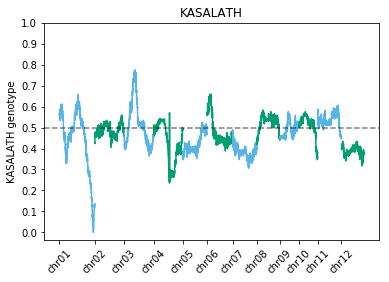

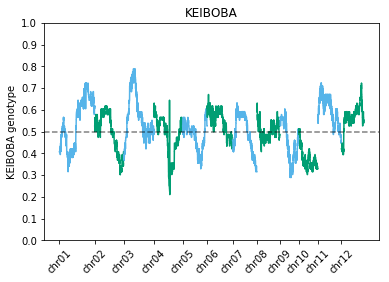

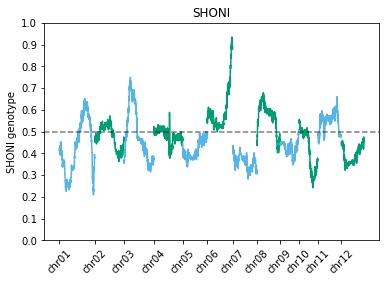

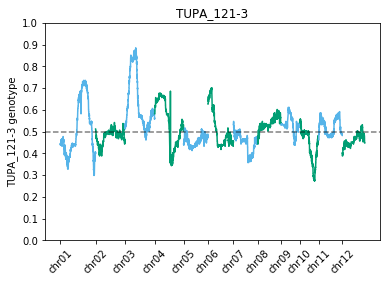

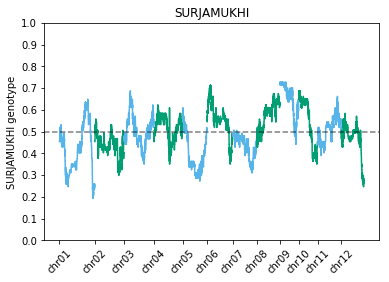

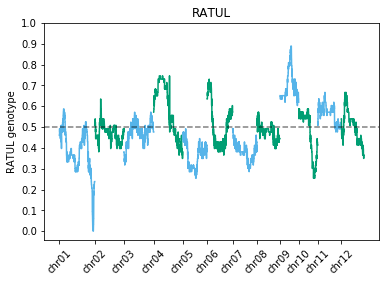

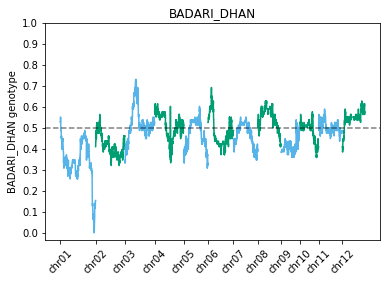

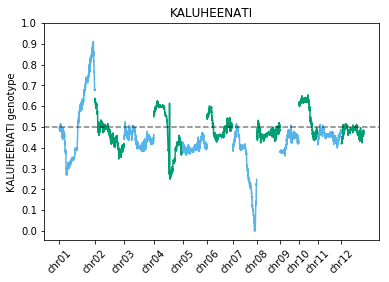

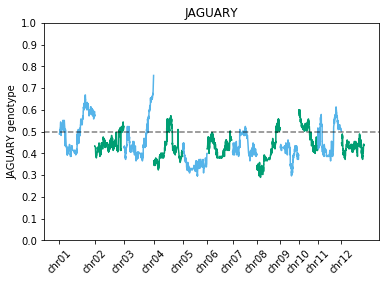

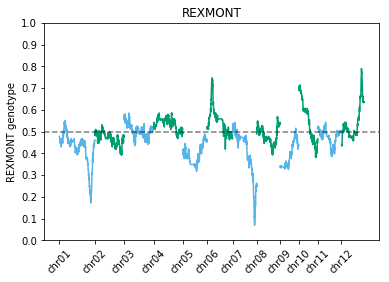

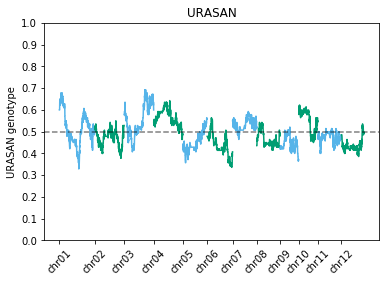

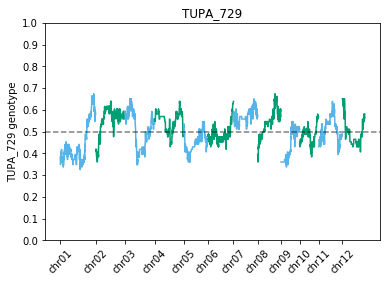

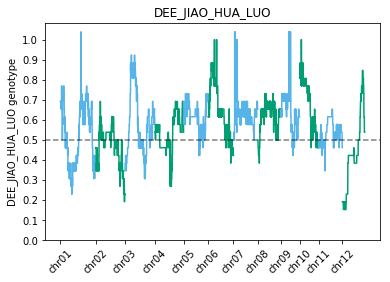

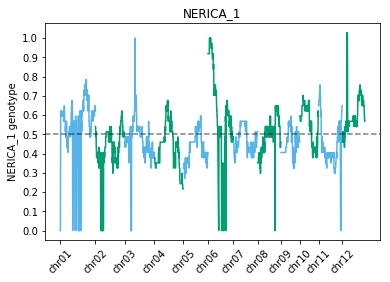

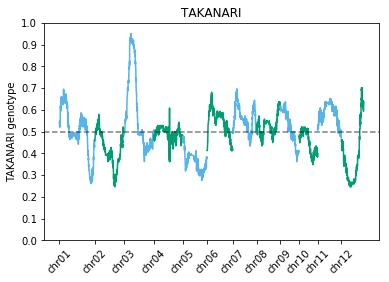

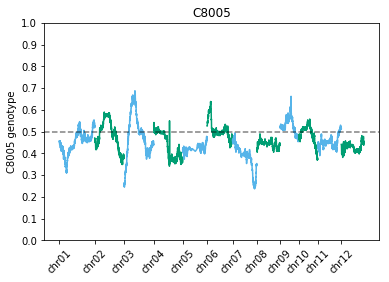

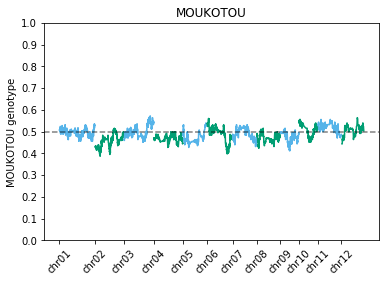

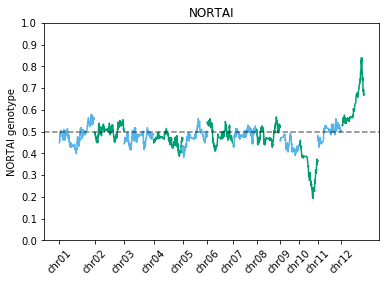

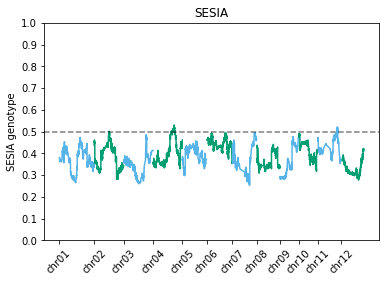

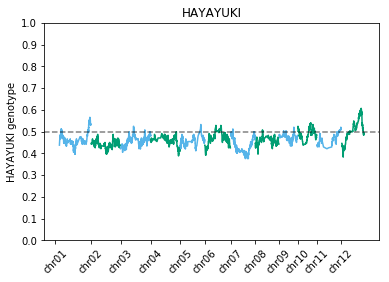

In [83]:
#fig, ax_lst = plt.subplots(2, 10, sharex='col', sharey='row')
#for key, idx in zip(samples,range(len(samples))):
#    j = idx // 10
#    i = idx - j * 10
#    ax_lst[j][i].set_ylabel(key)
#    ax_lst[j][i].set_xticks([sum(list(genome_size.values())[0:i]) for i in range(1, len(genome_size))])
#    ax_lst[j][i].plot(homo_B[key])
#    #print('{}: i={}, j={}, idx={}'.format(key, i, j, idx))
#fig.savefig('Founder_genotype_frequencies.png', format='png', transparent=True)

for key, founder in zip(samples, founders):
    plt.figure()
    c_segments = [genome_offset[:len(genome_offset)-1], genome_offset[1:]]
    c_segments[0].append(c_segments[1][-1])
    c_segments[1].append(c_segments[1][-1] + genome_size['chr12'])
    
    
    plt.gca().set_prop_cycle(plt.cycler('color', list(UCSC_colors.values())))
    x=np.array(homo_B[key]['x'])
    y=np.array(homo_B[key]['y'])
    for c, start, stop in zip(chroms, c_segments[0], c_segments[1]):
        mask = (x >= start) & (x < stop)
        plt.plot(x[mask], y[mask])
    
    plt.xticks(genome_offset, list(chrom_offset_idx.keys()), rotation=45)
    plt.yticks(np.linspace(0,1,11))
    plt.title('{}'.format(founder))
    plt.ylabel('{} genotype'.format(founder))
    plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
    plt.savefig('{}_{}_genotype_frequencies.png'.format(key, founder), format='png')
    plt.show()
    plt.close()


#### The next series of plots will be 100 kbp sliding window analysis of the frequency of recombination events in the 20 founders using a set of 3,745 SNPs that all twenty founders possess.

In [29]:
rf_window_datafiles = ['recombination_frequency/N01_KASALATH_recombination_frequency.tsv',
                       'recombination_frequency/N03_KEIBOBA_recombination_frequency.tsv',
                       'recombination_frequency/N04_SHONI_recombination_frequency.tsv',
                       'recombination_frequency/N05_TUPA_121-3_recombination_frequency.tsv',
                       'recombination_frequency/N06_SURJAMUKHI_recombination_frequency.tsv',
                       'recombination_frequency/N07_RATUL_recombination_frequency.tsv',
                       'recombination_frequency/N08_BADARI_DHAN_recombination_frequency.tsv',
                       'recombination_frequency/N09_KALUHEENATI_recombination_frequency.tsv',
                       'recombination_frequency/N10_JAGUARY_recombination_frequency.tsv',
                       'recombination_frequency/N11_REXMONT_recombination_frequency.tsv',
                       'recombination_frequency/N12_URASAN_recombination_frequency.tsv',
                       'recombination_frequency/N13_TUPA_729_recombination_frequency.tsv',
                       'recombination_frequency/N14_DEE_JIAO_HUA_LUO_recombination_frequency.tsv',
                       'recombination_frequency/N16_NERICA_1_recombination_frequency.tsv',
                       'recombination_frequency/N17_TAKANARI_recombination_frequency.tsv',
                       'recombination_frequency/N18_C8005_recombination_frequency.tsv',
                       'recombination_frequency/N19_MOUKOTOU_recombination_frequency.tsv',
                       'recombination_frequency/N20_NORTAI_recombination_frequency.tsv',
                       'recombination_frequency/N21_SESIA_recombination_frequency.tsv',
                       'recombination_frequency/N22_HAYAYUKI_recombination_frequency.tsv',]

In [30]:
rf_window_dfs = OrderedDict()
for key, datafile in zip(samples, rf_window_datafiles):
    print('{} <=> {} Loaded.'.format(key, datafile))
    rf_window_dfs[key] = pd.read_csv(datafile, sep='\t')

N01 <=> recombination_frequency/N01_KASALATH_recombination_frequency.tsv Loaded.
N03 <=> recombination_frequency/N03_KEIBOBA_recombination_frequency.tsv Loaded.
N04 <=> recombination_frequency/N04_SHONI_recombination_frequency.tsv Loaded.
N05 <=> recombination_frequency/N05_TUPA_121-3_recombination_frequency.tsv Loaded.
N06 <=> recombination_frequency/N06_SURJAMUKHI_recombination_frequency.tsv Loaded.
N07 <=> recombination_frequency/N07_RATUL_recombination_frequency.tsv Loaded.
N08 <=> recombination_frequency/N08_BADARI_DHAN_recombination_frequency.tsv Loaded.
N09 <=> recombination_frequency/N09_KALUHEENATI_recombination_frequency.tsv Loaded.
N10 <=> recombination_frequency/N10_JAGUARY_recombination_frequency.tsv Loaded.
N11 <=> recombination_frequency/N11_REXMONT_recombination_frequency.tsv Loaded.
N12 <=> recombination_frequency/N12_URASAN_recombination_frequency.tsv Loaded.
N13 <=> recombination_frequency/N13_TUPA_729_recombination_frequency.tsv Loaded.
N14 <=> recombination_frequen

In [31]:
rf_window_dfs['N01'][0:10]

,CHROM,Window,Start,Stop,Count,N,Frequency
0,chr01,0,0,100000,0,171,0.000000
1,chr01,1,100000,200000,0,171,0.000000
2,chr01,2,200000,300000,7,171,0.040936
3,chr01,3,300000,400000,0,171,0.000000
4,chr01,4,400000,500000,6,171,0.035088
5,chr01,5,500000,600000,2,171,0.011696
6,chr01,6,600000,700000,2,171,0.011696
7,chr01,7,700000,800000,1,171,0.005848
8,chr01,8,800000,900000,1,171,0.005848
9,chr01,9,900000,1000000,2,171,0.011696


In [32]:
rf_window_plot = {key: dict() for key in samples}
for key in samples:
    rf_window_plot[key]['y'] = rf_window_dfs[key].loc[:, 'Frequency'].to_numpy()
    rf_window_plot[key]['x'] = list()
    for c in chroms:
        offset_x = (rf_window_dfs[key].loc[rf_window_dfs[key].CHROM == c, 'Start'].to_numpy() +
                    rf_window_dfs[key].loc[rf_window_dfs[key].CHROM == c, 'Stop'].to_numpy()) / 2.0
        offset_x += genome_offset[chrom_offset_idx[c]]
        rf_window_plot[key]['x'].extend(offset_x)


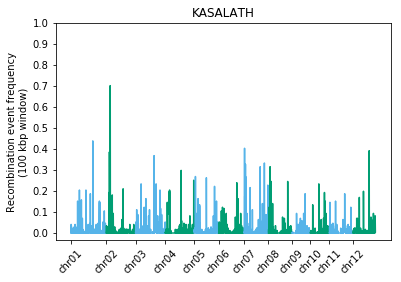

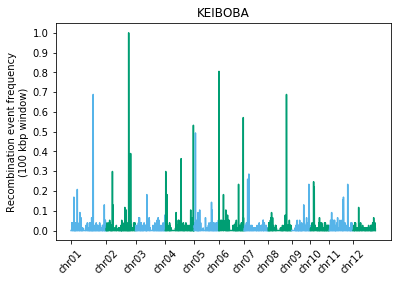

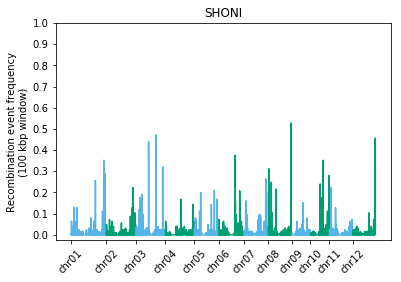

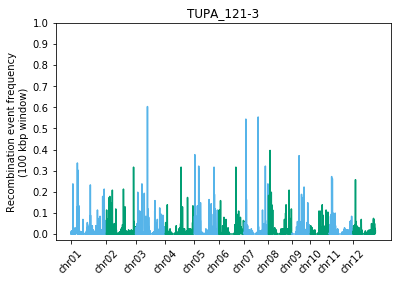

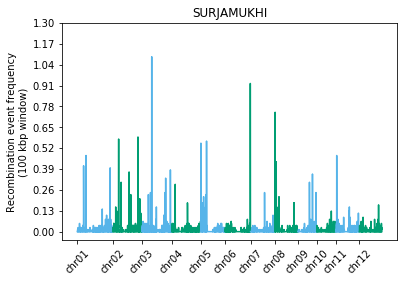

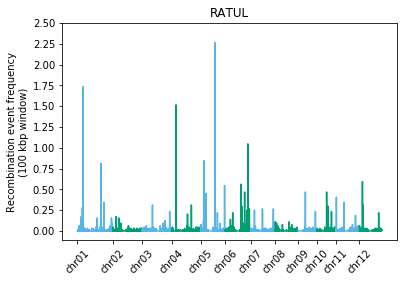

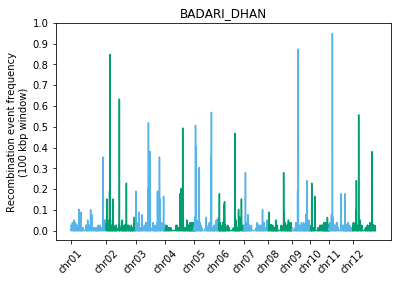

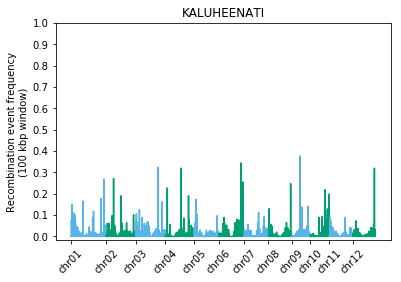

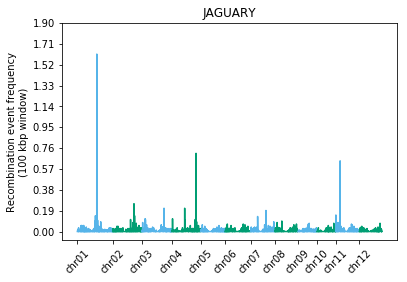

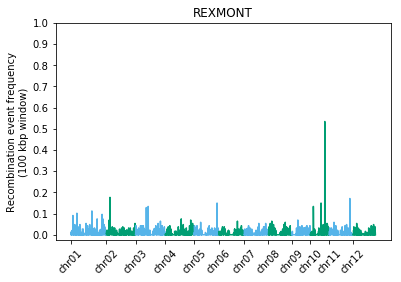

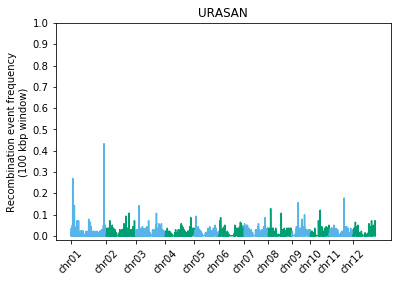

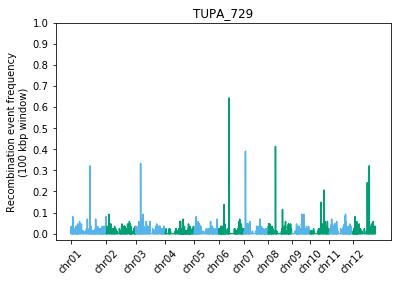

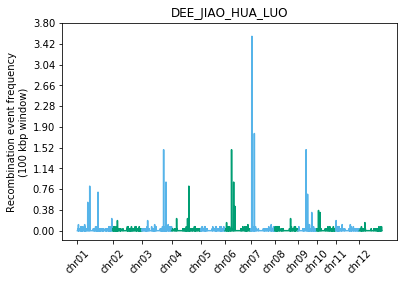

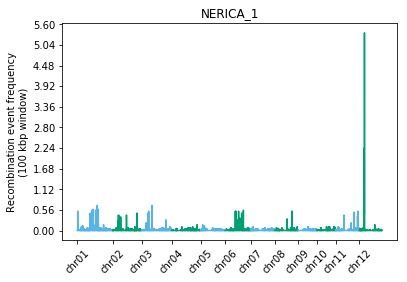

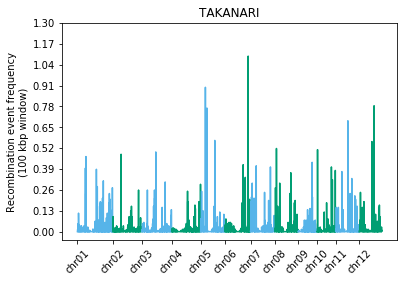

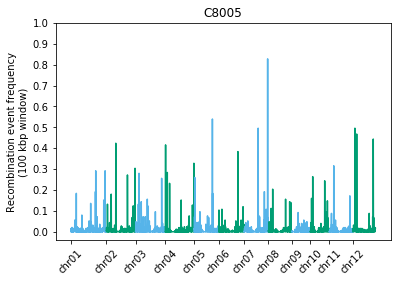

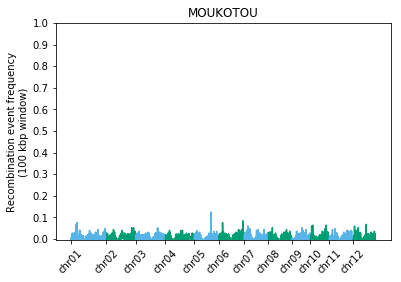

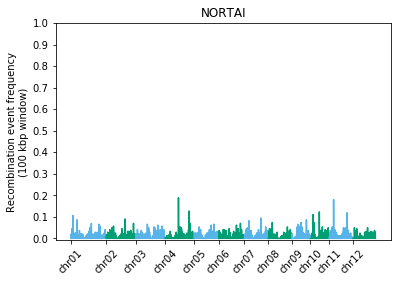

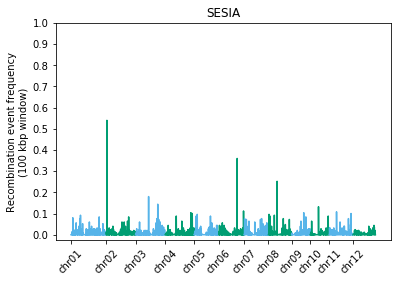

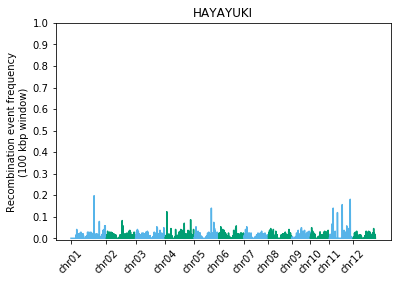

In [84]:
for key, founder in zip(samples, founders):
    plt.figure()
    c_segments = [genome_offset[:len(genome_offset)-1], genome_offset[1:]]
    c_segments[0].append(c_segments[1][-1])
    c_segments[1].append(c_segments[1][-1] + genome_size['chr12'])
    
    plt.gca().set_prop_cycle(plt.cycler('color', list(UCSC_colors.values())))
    x=np.array(rf_window_plot[key]['x'])
    y=np.array(rf_window_plot[key]['y'])
    for c, start, stop in zip(chroms, c_segments[0], c_segments[1]):
        mask = (x >= start) & (x < stop)
        plt.plot(x[mask], y[mask])
    
    y_max = np.max(rf_window_plot[key]['y'])
    if y_max <= 1.0:
        plt.yticks(np.linspace(0,1,11))
    else:
        plt.yticks(np.round(np.linspace(0, np.round(y_max + 0.25, decimals=1), 11), decimals=2))
    plt.xticks(genome_offset, list(chrom_offset_idx.keys()), rotation=45)
    plt.title('{}'.format(founder))
    plt.ylabel('Recombination event frequency\n(100 kbp window)')
    plt.savefig('{}_{}_recombination_frequencies_100kbp_window.png'.format(key, founder), format='png')
    plt.show()
    plt.close()

#### The next series of plots will be the total number of recombination events in all 20 founders using the complete set of SNPs that all twenty founders possess. (Note: This means that some SNPs may exist in one (or more) founder's data set, but not in other's)

In [8]:
high_density_by_chrom = OrderedDict()
chroms = [''.join(['chr','{0:02d}'.format(n)]) for n in range(1, 13)]
for key in samples:
    if key not in high_density_by_chrom.keys():
        high_density_by_chrom[key] = OrderedDict()
    for c in chroms:
        high_density_by_chrom[key][c] = pd.concat([data_dfs[key][data_dfs[key].CHROM==c].iloc[:,0:2],
                                                   data_dfs[key][data_dfs[key].CHROM==c].iloc[:,11:-6]], axis=1)

In [9]:
breakpoints = OrderedDict()
# for every sample
for key in samples:
    # for every chromosome in the genome
    breakpoints[key] = OrderedDict()
    for c in chroms:
        breakpoints[key][c] = list()
        for col in range(2, high_density_by_chrom[key][c].shape[1]):
            # treat the sample plant as a numpy array
            plant = high_density_by_chrom[key][c].iloc[:, col].to_numpy()
            prev='H'
            prev_idx = -1
            current_idx = 0
            for current in plant:
                if current != prev:
                    if (current == 'A' and prev == 'B') or (current == 'B' and prev == 'A'):
                        prev_c, prev_pos = high_density_by_chrom[key][c].iloc[prev_idx, 0:2].to_numpy()
                        current_c, current_pos = high_density_by_chrom[key][c].iloc[current_idx, 0:2].to_numpy()
                        breakpoints[key][c].append([c, prev_pos+(current_pos-prev_pos)/2, prev_pos, current_pos,
                                                    '{}{}'.format(prev,current),
                                                    high_density_by_chrom[key][c].columns[col]])
                prev = current
                prev_idx += 1
                current_idx +=1
        
        breakpoints[key][c] = pd.DataFrame(data=breakpoints[key][c], columns=['CHROM', 'POS', 'MARKER1', 'MARKER2', 'TRANSITION', 'SOURCE'])

In [10]:
# Sort the breakpoint data inplace by the POS column
# Do this for all samples and all chromosomes in each sample
for key in samples:
    for c in chroms:
        breakpoints[key][c].sort_values(by=['POS'], inplace=True)

In [11]:
breakpoints['N01']['chr01'][0:10]

,CHROM,POS,MARKER1,MARKER2,TRANSITION,SOURCE
727,chr01,267489.5,230811,304168,BA,N01_140
222,chr01,267489.5,230811,304168,AB,N01_054
73,chr01,267489.5,230811,304168,AB,N01_016
756,chr01,267489.5,230811,304168,AB,N01_149
624,chr01,267489.5,230811,304168,BA,N01_109
32,chr01,267489.5,230811,304168,BA,N01_010
417,chr01,267489.5,230811,304168,AB,N01_099
394,chr01,481792.0,481439,482145,BA,N01_095
395,chr01,482203.0,482145,482261,AB,N01_095
169,chr01,483996.0,483872,484120,BA,N01_035


In [15]:
# We need to total up all POS that are the same and report back the CHROM, POS and the total
# We want to aggregate this for all samples
grand_totals = OrderedDict()
for key in samples:
    grand_totals[key] = OrderedDict()
    for c in chroms:
        grand_totals[key][c] = np.zeros(genome_size[c])
        for row in breakpoints[key][c].itertuples(index=False):
            grand_totals[key][c][int(np.round(row.POS))] += 1

In [16]:
# Here is where we will keep the master tally (across all founders)
master_totals = OrderedDict()
for c in chroms:
    master_totals[c] = np.zeros(genome_size[c])

In [17]:
for key in samples:
    for c in chroms:
        master_totals[c] += grand_totals[key][c]

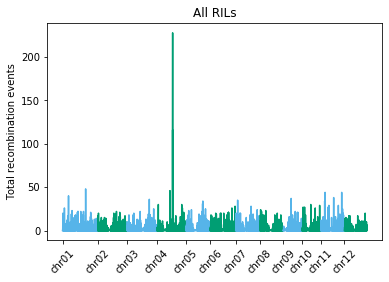

In [24]:
plt.figure()
    
plt.gca().set_prop_cycle(plt.cycler('color', list(UCSC_colors.values())))

for c, offset in zip(chroms, genome_offset):
    x = np.arange(genome_size[c])
    x += offset
    plt.plot(x, master_totals[c])
    #plt.axhline(y=np.mean(master_totals[c]), color='black', linestyle='--')
plt.xticks(genome_offset, list(chrom_offset_idx.keys()), rotation=45)
plt.title('All RILs')
plt.ylabel('Total recombination events')
plt.savefig('ALL_recombination_events.png', format='png')
plt.show()
plt.close()

There is an interesting anomaly on Chromosome 4, when looking at genome-wide recombination events.  We should examine this further to see:
* What founder(s) is/are contributing to this large number of recombinations.
* Are there any motifs at this locus that may be identified?
    * If so, do they exist elsewhere in the genome?

In [25]:
# Obtain the top-10 maximum values on chr04
list(reversed(sorted(master_totals['chr04'])))[0:10]

[228.0, 116.0, 110.0, 76.0, 60.0, 46.0, 31.0, 31.0, 30.0, 30.0]

We can make use of `numpy.where` to find the index (or indices) where a particular value is located in the array.  
Recall that in this array, the index is the chromosome coordinate.

In [47]:
print('Value 228.0 at {}'.format(np.where(master_totals['chr04'] == 228.0)))
print('Value 116.0 at {}'.format(np.where(master_totals['chr04'] == 116.0)))
print('Value 110.0 at {}'.format(np.where(master_totals['chr04'] == 110.0)))
print('Value 76.0 at {}'.format(np.where(master_totals['chr04'] == 76.0)))
print('Value 60.0 at {}'.format(np.where(master_totals['chr04'] == 60.0)))
print('Value 46.0 at {}'.format(np.where(master_totals['chr04'] == 46.0)))

Value 228.0 at (array([19385432]),)
Value 116.0 at (array([19402886]),)
Value 110.0 at (array([19404577]),)
Value 76.0 at (array([19408259]),)
Value 60.0 at (array([19386169]),)
Value 46.0 at (array([16111504]),)


We see that the top-three values are fairly close to one another on the chromosome.  
This information helps us narrow down where to look when examining the DNA sequence for possible motifs associated with double-stranded breaks (DSBs) that occur during meiotic replication / gamete formation.

In [27]:
for key, founder in zip(samples, founders):
    if grand_totals[key]['chr04'][19385432] != 0.0:
        print('{} {} has {} DSBs at chr04 position 19,385,432.'.format(key, founder, grand_totals[key]['chr04'][19385432]))

N01 KASALATH has 44.0 DSBs at chr04 position 19,385,432.
N05 TUPA_121-3 has 61.0 DSBs at chr04 position 19,385,432.
N06 SURJAMUKHI has 13.0 DSBs at chr04 position 19,385,432.
N09 KALUHEENATI has 77.0 DSBs at chr04 position 19,385,432.
N18 C8005 has 33.0 DSBs at chr04 position 19,385,432.


In [48]:
for key, founder in zip(samples, founders):
    if grand_totals[key]['chr04'][19386169] != 0.0:
        print('{} {} has {} DSBs at chr04 position 19,386,169.'.format(key, founder, grand_totals[key]['chr04'][19386169]))

N03 KEIBOBA has 27.0 DSBs at chr04 position 19,386,169.
N17 TAKANARI has 33.0 DSBs at chr04 position 19,386,169.


In [52]:
breakpoints['N03']['chr04'][breakpoints['N03']['chr04'].POS == 19386169]

,CHROM,POS,MARKER1,MARKER2,TRANSITION,SOURCE
283,chr04,19386169.0,19379180,19393158,AB,N03_066
181,chr04,19386169.0,19379180,19393158,AB,N03_037
299,chr04,19386169.0,19379180,19393158,AB,N03_070
201,chr04,19386169.0,19379180,19393158,AB,N03_044
66,chr04,19386169.0,19379180,19393158,AB,N03_021
287,chr04,19386169.0,19379180,19393158,AB,N03_067
192,chr04,19386169.0,19379180,19393158,AB,N03_040
306,chr04,19386169.0,19379180,19393158,AB,N03_076
3,chr04,19386169.0,19379180,19393158,AB,N03_001
291,chr04,19386169.0,19379180,19393158,AB,N03_068
